In [32]:
%matplotlib inline

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('ggplot')

NUMERO_REAL = r"[-+]?\d*[\.]?\d*[eE]?[-+]?\d*"

In [2]:
def set_ax_style(ax):
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_linewidth(1.0)


    ticklabels = ax.get_xticklabels() + ax.get_yticklabels()   
    for label in ticklabels:
        label.set_fontsize(15)


In [3]:
columns = ["caso", "w", "kx", "ky", "kz", "i0", "i1", "i2", "i10"]

In [4]:
def read_results(filename):
    df = pd.DataFrame(columns=columns)
    
    f = open(filename)
    state = 0
    for line in f:
        
        if state == 0:
            w = float(line.split()[2])
            print "w = ", w
            state += 1
        
        elif state == 1:
            l = line.split()

            kx, ky, kz = int(l[2]), int(l[5]), int(l[8])
            
            line = f.next()
            i0 = float(line.split()[1])
            
            line = f.next()
            i1 = float(line.split()[1])
            
            line = f.next()
            i2 = float(line.split()[1])

            
            line = f.next()
            i10 = float(line.split()[1])

            d = {}
            d["caso"] = filename
            d["w"]  = w
            d["kx"] = kx
            d["ky"] = ky
            d["kz"] = kz
            d["i0"] = i0
            d["i1"] = i1
            d["i2"] = i2
            d["i10"] = i10
            
            df = df.append(d, ignore_index=True)
            
    f.close()
    return df 

In [48]:
data = read_results("caso10.gdt_w_1_1")
data["r2"] = data.i2/data.i0
data["r10"] = data.i10/data.i0

w =  1.0


In [6]:
kzs = data["kz"].unique()

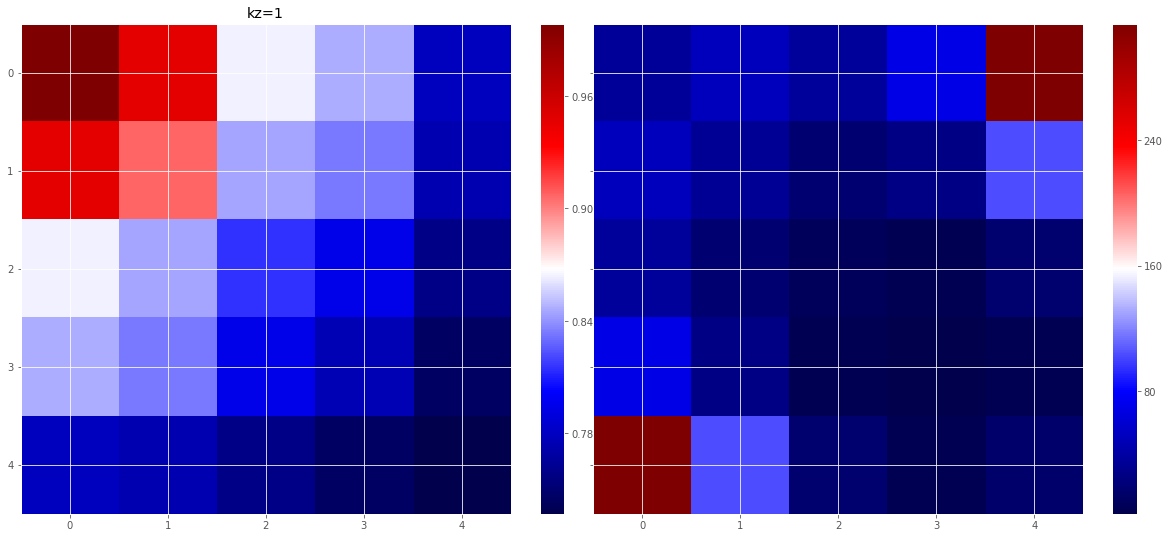

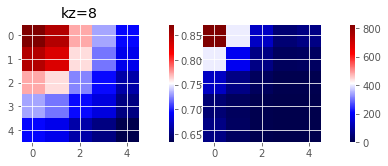

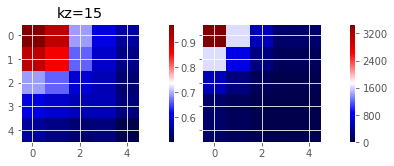

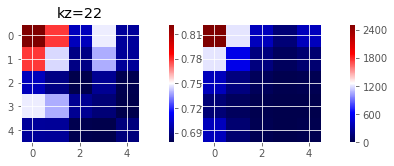

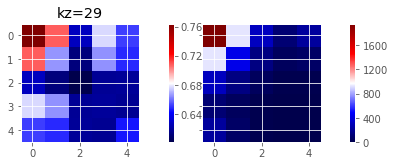

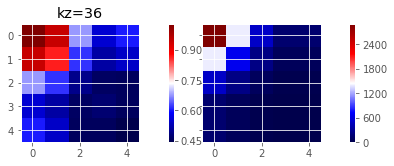

In [56]:
for kz in kzs:
    fig = plt.figure(1, (20,12))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                         nrows_ncols=(1, 2),
                         axes_pad=0.4,
                         add_all=True,
                         label_mode="L",
                         cbar_location="right",
                         cbar_mode="each"
                         )
    #fig, ax = plt.subplots(1,1, figsize=(15,8), subplot_kw={'xticks': [], 'yticks': []})
    ax = grid[0]
    ax.set_title("kz=%d" % kz)
    d = data[data.kz == kz]

    kxs = d.kx.unique()
    kys = d.ky.unique()
    values = np.zeros((len(kxs), len(kys)))
    
    for i,kx in enumerate(kxs):
        for j, ky in enumerate(kys):
            val = float(d[(d.kx == kx) & (d.ky == ky)].r2)
            values[i,j] = val

    my_cmap = plt.cm.get_cmap('seismic')
    
    im = ax.imshow(values, interpolation='none', cmap='seismic')
    grid.cbar_axes[0].colorbar(im)
    
    ax = grid[1]
    for i,kx in enumerate(kxs):
        for j, ky in enumerate(kys):
            val = float(d[(d.kx == kx) & (d.ky == ky)].r10)
            values[i,j] = val
    im = ax.imshow(values, interpolation='none', cmap='seismic')
    grid.cbar_axes[1].colorbar(im)
    
    plt.draw()
    plt.show()
    plt.savefig("kz_%d.png" % kz)